In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties  
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)  
%matplotlib inline

w1:
 [[-0.8113182   1.4845988   0.06532937]
 [-2.4427042   0.0992484   0.5912243 ]]
w2:
 [[-0.8113182 ]
 [ 1.4845988 ]
 [ 0.06532937]]


After 0 training step(s), loss on all data is 5.13118
After 100 training step(s), loss on all data is 1.17068
After 200 training step(s), loss on all data is 0.585765
After 300 training step(s), loss on all data is 0.468183
After 400 training step(s), loss on all data is 0.43924
After 500 training step(s), loss on all data is 0.429111
After 600 training step(s), loss on all data is 0.42348
After 700 training step(s), loss on all data is 0.419242
After 800 training step(s), loss on all data is 0.415667
After 900 training step(s), loss on all data is 0.412545


w1:
 [[-0.70543677  1.041196    0.07933979]
 [-2.338068   -0.20093027  0.59261197]]
w2:
 [[-0.02190054]
 [ 1.0554427 ]
 [-0.0898941 ]]


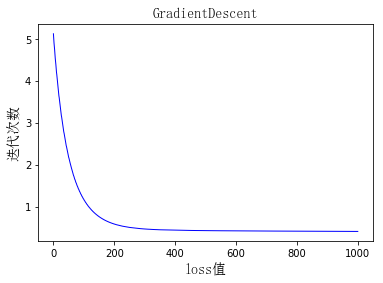

In [13]:
BATCH_SIZE = 8
seed = 23455

rng = np.random.RandomState(seed)

X=rng.rand(32,2)

Y=[[int(x0+x1<1)] for (x0,x1) in X]

# print("X:\n",X)
# print("Y:\n",Y)

x=tf.placeholder(tf.float32,shape=(None,2))
y_=tf.placeholder(tf.float32,shape=(None,1))

w1=tf.Variable(tf.random_normal([2,3],stddev=1,seed=1))
w2=tf.Variable(tf.random_normal([3,1],stddev=1,seed=1))

a=tf.matmul(x,w1)
y=tf.matmul(a,w2)

loss = tf.reduce_mean(tf.square(y-y_))
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
# train_step = tf.train.MomentumOptimizer(0.001,0.9).minimize(loss)
# train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

STEPS=1000
d_x=np.linspace(0,STEPS,STEPS)
d_y=[]
with tf.Session() as sess:
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    print("w1:\n",sess.run(w1))
    print("w2:\n",sess.run(w2))
    print("\n")
    
    for i in range(STEPS):
        start = (i*BATCH_SIZE)%32
        end = start+BATCH_SIZE
        sess.run(train_step,feed_dict={x:X[start:end],y_:Y[start:end]})
        total_loss = sess.run(loss,feed_dict={x:X,y_:Y})
        if i%100==0:
            print("After %d training step(s), loss on all data is %g"%(i,total_loss))
        d_y.append(total_loss)
    print("\n")
    print("w1:\n",sess.run(w1))
    print("w2:\n",sess.run(w2))
    
plt.title('GradientDescent',fontsize='large',fontweight='bold',fontproperties=font) #设置字体大小与格式
plt.xlabel("loss值",fontproperties=font)
plt.ylabel("迭代次数",fontproperties=font)
plt.plot(d_x,d_y,'b',lw=1) #绘制折线图 1x 2 y 3 color 4 line w
plt.show()

w1:
 [[-0.8113182   1.4845988   0.06532937]
 [-2.4427042   0.0992484   0.5912243 ]]
w2:
 [[-0.8113182 ]
 [ 1.4845988 ]
 [ 0.06532937]]


After 0 training step(s), loss on all data is 5.13118
After 100 training step(s), loss on all data is 0.404495
After 200 training step(s), loss on all data is 0.391737
After 300 training step(s), loss on all data is 0.387161
After 400 training step(s), loss on all data is 0.385254
After 500 training step(s), loss on all data is 0.384391
After 600 training step(s), loss on all data is 0.383979
After 700 training step(s), loss on all data is 0.383776
After 800 training step(s), loss on all data is 0.383673
After 900 training step(s), loss on all data is 0.383619


w1:
 [[-0.6147175   0.8401091   0.07520181]
 [-2.2577806  -0.14804551  0.5681112 ]]
w2:
 [[-0.10179819]
 [ 0.7837406 ]
 [-0.04573626]]


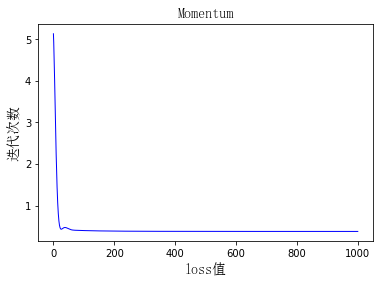

In [14]:
BATCH_SIZE = 8
seed = 23455

rng = np.random.RandomState(seed)

X=rng.rand(32,2)

Y=[[int(x0+x1<1)] for (x0,x1) in X]

# print("X:\n",X)
# print("Y:\n",Y)

x=tf.placeholder(tf.float32,shape=(None,2))
y_=tf.placeholder(tf.float32,shape=(None,1))

w1=tf.Variable(tf.random_normal([2,3],stddev=1,seed=1))
w2=tf.Variable(tf.random_normal([3,1],stddev=1,seed=1))

a=tf.matmul(x,w1)
y=tf.matmul(a,w2)

loss = tf.reduce_mean(tf.square(y-y_))
# train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
train_step = tf.train.MomentumOptimizer(0.001,0.9).minimize(loss)
# train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

STEPS=1000
d_x=np.linspace(0,STEPS,STEPS)
d_y=[]
with tf.Session() as sess:
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    print("w1:\n",sess.run(w1))
    print("w2:\n",sess.run(w2))
    print("\n")
    
    for i in range(STEPS):
        start = (i*BATCH_SIZE)%32
        end = start+BATCH_SIZE
        sess.run(train_step,feed_dict={x:X[start:end],y_:Y[start:end]})
        total_loss = sess.run(loss,feed_dict={x:X,y_:Y})
        if i%100==0:
            print("After %d training step(s), loss on all data is %g"%(i,total_loss))
        d_y.append(total_loss)
    print("\n")
    print("w1:\n",sess.run(w1))
    print("w2:\n",sess.run(w2))
    
plt.title('Momentum',fontsize='large',fontweight='bold',fontproperties=font) #设置字体大小与格式
plt.xlabel("loss值",fontproperties=font)
plt.ylabel("迭代次数",fontproperties=font)
plt.plot(d_x,d_y,'b',lw=1) #绘制折线图 1x 2 y 3 color 4 line w
plt.show()

w1:
 [[-0.8113182   1.4845988   0.06532937]
 [-2.4427042   0.0992484   0.5912243 ]]
w2:
 [[-0.8113182 ]
 [ 1.4845988 ]
 [ 0.06532937]]


After 0 training step(s), loss on all data is 5.20999
After 100 training step(s), loss on all data is 3.38683
After 200 training step(s), loss on all data is 2.21104
After 300 training step(s), loss on all data is 1.41378
After 400 training step(s), loss on all data is 0.905471
After 500 training step(s), loss on all data is 0.617026
After 600 training step(s), loss on all data is 0.47714
After 700 training step(s), loss on all data is 0.420624
After 800 training step(s), loss on all data is 0.401273
After 900 training step(s), loss on all data is 0.394929


w1:
 [[-0.44223592  1.0738461   0.82303965]
 [-2.103039   -0.2739959   1.2372345 ]]
w2:
 [[-0.42315555]
 [ 1.1096852 ]
 [-0.5342834 ]]


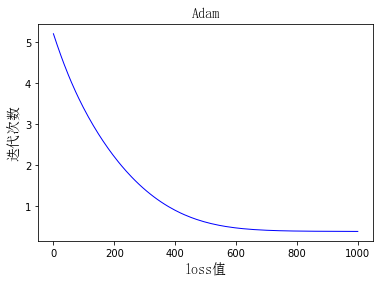

In [15]:
BATCH_SIZE = 8
seed = 23455

rng = np.random.RandomState(seed)

X=rng.rand(32,2)

Y=[[int(x0+x1<1)] for (x0,x1) in X]

# print("X:\n",X)
# print("Y:\n",Y)

x=tf.placeholder(tf.float32,shape=(None,2))
y_=tf.placeholder(tf.float32,shape=(None,1))

w1=tf.Variable(tf.random_normal([2,3],stddev=1,seed=1))
w2=tf.Variable(tf.random_normal([3,1],stddev=1,seed=1))

a=tf.matmul(x,w1)
y=tf.matmul(a,w2)

loss = tf.reduce_mean(tf.square(y-y_))
# train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
# train_step = tf.train.MomentumOptimizer(0.001,0.9).minimize(loss)
train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

STEPS=1000
d_x=np.linspace(0,STEPS,STEPS)
d_y=[]
with tf.Session() as sess:
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    print("w1:\n",sess.run(w1))
    print("w2:\n",sess.run(w2))
    print("\n")
    
    for i in range(STEPS):
        start = (i*BATCH_SIZE)%32
        end = start+BATCH_SIZE
        sess.run(train_step,feed_dict={x:X[start:end],y_:Y[start:end]})
        total_loss = sess.run(loss,feed_dict={x:X,y_:Y})
        if i%100==0:
            print("After %d training step(s), loss on all data is %g"%(i,total_loss))
        d_y.append(total_loss)
    print("\n")
    print("w1:\n",sess.run(w1))
    print("w2:\n",sess.run(w2))
    
plt.title('Adam',fontsize='large',fontweight='bold',fontproperties=font) #设置字体大小与格式
plt.xlabel("loss值",fontproperties=font)
plt.ylabel("迭代次数",fontproperties=font)
plt.plot(d_x,d_y,'b',lw=1) #绘制折线图 1x 2 y 3 color 4 line w
plt.show()